# 📌 Notebook Goals
> - Understand Basic NLP Topics (Tokenization, Stemming, Lemmatization, Stop words).
> - Spacy for Vocabulary Matching.
> - Gensim for topic modeling and semantic similarity
> - General discussion of what Natural Language Processing is.

# 📚 What is Spacy?
> - Spacy is an open source Natural Language Processing Library designed to effectively handle NLP tasks with the most efficient implementation of common algorithms.
> - For many NLP tasks, Spacy only has one implementation method, choosing the most efficient algorithm currently available. This means you often don't have the option to choose other algorithms.

# 📝 What is NLTK?
> - NLTK - Natural Language Toolkit is a very popular open source. Initially released in 2001, it is much older than Spacy (released 2015). It also provides many functionalities, but includes less efficient implementations.

# 💪🏻 NLTK vs Spacy
> - For many common NLP tasks, Spacy is much faster and more efficient, at the cost of the user not being able to choose algorithmic implementations. However, Spacy does not include pre-created models for some applications, such as sentiment analysis, which is typically easier to perform with NLTK.

# 📚 spaCy Basics

**spaCy** (https://spacy.io/) is an open-source Python library that parses and "understands" large volumes of text. Separate models are available that cater to specific languages (English, French, German, etc.).


## ✔️ Working with spaCy
- There are few keys steps for working with Spacy:
> 1. Loading the language library.
> 2. Building a Pipeline Object
> 3. Using Tokens
> 4. Parts-of-Speech Tagging
> 5. Understanding Token Attributes
___
## 🔪 Tokenization

The first step in processing text is to split up all the component parts (words & punctuation) into "tokens". These tokens are annotated inside the Doc object to contain descriptive information. 

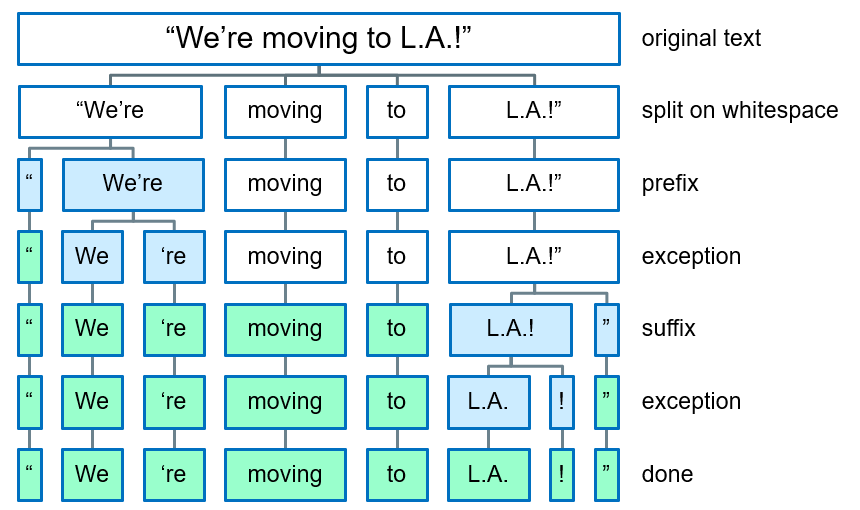

-  **Prefix**:	Character(s) at the beginning &#9656; `$ ( “ ¿`
-  **Suffix**:	Character(s) at the end &#9656; `km ) , . ! ”`
-  **Infix**:	Character(s) in between &#9656; `- -- / ...`
-  **Exception**: Special-case rule to split a string into several tokens or prevent a token from being split when punctuation rules are applied &#9656; `St. U.S.`

> Notice that tokens are pieces of the original text. That is, we don't see any conversion to word stems or lemmas (base forms of words) and we haven't seen anything about organizations/places/money etc. Tokens are the basic building blocks of a Doc object - everything that helps us understand the meaning of the text is derived from tokens and their relationship to one another.

## 📚 spaCy Objects

> After importing the spacy module in the cell above we loaded a **model** and named it `nlp`.<br>Next we created a **Doc** object by applying the model to our text, and named it `doc`.<br>spaCy also builds a companion **Vocab** object that we'll cover in later sections.<br>The **Doc** object that holds the processed text is our focus here.

## ➿ Pipeline
> When we run `nlp`, our text enters a *processing pipeline* that first breaks down the text and then performs a series of operations to tag, parse and describe the data.   Image source: 
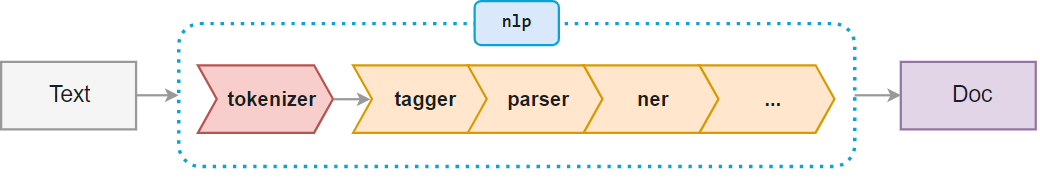
We can check to see what components currently live in the pipeline. In later sections we'll learn how to disable components and add new ones as needed.

___
## 🔖 Part-of-Speech Tagging (POS)
> The next step after splitting the text up into tokens is to assign parts of speech. In the above example, `Tesla` was recognized to be a ***proper noun***. Here some statistical modeling is required. For example, words that follow "the" are typically nouns.

___
## 🧮 Dependencies
> We also looked at the syntactic dependencies assigned to each token. `Tesla` is identified as an `nsubj` or the ***nominal subject*** of the sentence.

___
## ➕ Additional Token Attributes
> We'll see these again in upcoming lectures. For now we just want to illustrate some of the other information that spaCy assigns to tokens:

|Tag|Description|doc2[0].tag|
|:------|:------:|:------|
|`.text`|The original word text<!-- .element: style="text-align:left;" -->|`Tesla`|
|`.lemma_`|The base form of the word|`tesla`|
|`.pos_`|The simple part-of-speech tag|`PROPN`/`proper noun`|
|`.tag_`|The detailed part-of-speech tag|`NNP`/`noun, proper singular`|
|`.shape_`|The word shape – capitalization, punctuation, digits|`Xxxxx`|
|`.is_alpha`|Is the token an alpha character?|`True`|
|`.is_stop`|Is the token part of a stop list, i.e. the most common words of the language?|`False`|


___
## 🧾 Spans
> Large Doc objects can be hard to work with at times. A **span** is a slice of Doc object in the form `Doc[start:stop]`.

___
## 📑 Sentences
> Certain tokens inside a Doc object may also receive a "start of sentence" tag. While this doesn't immediately build a list of sentences, these tags enable the generation of sentence segments through `Doc.sents`. Later we'll write our own segmentation rules.

In [ ]:
import spacy
import pandas as pd

data = pd.read_csv('../input/nlp-getting-started/train.csv')

# 1. Loading the language library
nlp = spacy.load('en_core_web_sm')

# 2. Building a Pipline Object
doc = nlp(u'''
Tesla will start selling cars in India next year, government says. 
Elon Mask (CEO of Tesla) is now the richest men in the world.
''')


# 3. Using Tokens
for token in doc:
    print(f"{token.text:{12}}{token.pos_:{12}}{token.dep_:{12}}{token.lemma_}")

In [ ]:
data[data.target == 1]['text'][1]

In [ ]:
data[data.target == 1]['text'][300]

In [ ]:
data[data.target == 0]['text']

In [ ]:
nlp.pipeline

In [ ]:
nlp.pipe_names

In [ ]:
text = """
Elon Musk, the billionaire CEO of Tesla and SpaceX, is now the richest person in the world, surpassing former titleholder and Amazon chief Jeff Bezos with a net worth of $189.7 billion, according to Forbes’s real-time billionaire net-worth estimates on Jan. 8, 2021 at 1pm. Since March, Musk’s wealth has grown almost seven-fold, up a staggering $163.1 billion.
"""
doc = nlp(text)

In [ ]:
quote = doc[30:50]
print(quote)
print(type(quote))

In [ ]:
for i, sentence in enumerate(doc.sents, 1):
    print(f"{i} - {sentence}")

## Named Entity

In [ ]:
for entity in doc.ents:
    print(f"{entity.text:-<{20}}{entity.label_:-<{20}}{str(spacy.explain(entity.label_))}")

# Noun Chunks

In [ ]:
for chunk in doc.noun_chunks:
    print(chunk.text)

## Built-in Visualizers

In [ ]:
from spacy import displacy

displacy.render(doc, style='dep', jupyter=True, options={'distance':90})

## Visualizing the entity recongnizer

In [ ]:
displacy.render(doc, style='ent', jupyter=True)

## Stemming

- Often when searching text for a certain keyword, it helps if the search returns variations of the word. For instance, searching for 'boat' might return 'boats' and 'boating'. Here, 'boat' would be the stem for [boat, boater, boating, boats].


In [ ]:
import nltk
from nltk.stem.porter import PorterStemmer

words = ['run', 'runner', 'ran', 'runs', 'easily', 'fairly', 'fairness']
p_stemmer = PorterStemmer()

for word in words:
    print(f"{word} --------> {p_stemmer.stem(word)}")

In [ ]:
from nltk.stem.snowball import SnowballStemmer

words = ['run', 'runner', 'ran', 'runs', 'easily', 'fairly', 'fairness']
s_stemmer = SnowballStemmer(language='english')

for word in words:
    print(f"{word} --------> {s_stemmer.stem(word)}")

In [ ]:
words = ['generous', 'generation', 'generously', 'generate']

print('===============SNOWBALL STEMMER================')
for word in words:
    print(f"{word} --------> {s_stemmer.stem(word)}")
    
print('===============PORTER STEMMER================')
for word in words:
    print(f"{word} --------> {p_stemmer.stem(word)}")

## Lemmatization

- In contrast to stemming, lemmatization looks beyond word reduction, and considers a language's full vocabulary to apply a morphological analysis to words. The lemma of 'was' is 'be' and the lemma of 'meeting' might be 'meet' or 'meeting' depending on its use in a sentence. Lemmatization is typically seen as much more informative than simple stemming, which is why Spacy has opted to only have Lemmatization available instead of Stemming. 

In [ ]:
text = nlp(u"I am a runner running in a race because I love to run since I ran everyday")

for token in text:
    print(f"{token.text:{12}}{token.pos_:{10}}\t{token.lemma:{20}}\t{token.lemma_}")

## Stop Words

- Words like 'a' and 'the' appear so frequently that they don't require tagging as thoroughly as nouns, verbs and modifiers. We call these stop words, and they can be filtered from text to be processed. Spacy holds a built-in list of some `326` English stop words.

In [ ]:
nlp = spacy.load('en_core_web_sm')

print(nlp.Defaults.stop_words)
print(len(nlp.Defaults.stop_words))

In [ ]:
words = ['is', 'and', 'Tesla', 'you', 'IS', 'AND']

for word in words:
    print(f"{word}: is stop word: {nlp.vocab[word].is_stop}")

In [ ]:
# We can add our own stop word
nlp.Defaults.stop_words.add('btw')
nlp.Defaults.stop_words.add('u')

sentence = 'Where was u ? I was looking for you btw session...'
for word in sentence.split():
    print(f"{word:{20}}: is stop word: {nlp.vocab[word].is_stop}")

In [ ]:
# We can also remove stop word
nlp.vocab['for'].is_stop = False
sentence = 'Where was u ? I was looking for you btw session...'
for word in sentence.split():
    print(f"{word:{20}}: is stop word: {nlp.vocab[word].is_stop}")

## Phrase Matching and Vocabulary

- We can think of this as a powerful version of Regular Expression where we actually take parts of speech into account for our patterns.

In [ ]:
from spacy.matcher import Matcher

matcher = Matcher(nlp.vocab)
pattern_1 = [{'LOWER': 'solarpower'}] # ----> SolarPower
pattern_2 = [{'LOWER': 'solar'}, {'IS_PUNCT': True}, {'LOWER': 'power'}] # ---> Solar-Power
pattern_3 = [{'LOWER': 'solar'}, {'LOWER': 'power'}] # ---> Solar Power

matcher.add('SolarPower', None, pattern_1, pattern_2, pattern_3)

text = u'''
Solar Power is the conversion of energy from sunlight into electricity, 
either directly using photovoltaics (PV), indirectly using concentrated SolarPower, 
or a combination. Concentrated Solar-Power systems use lenses or mirrors and solar 
tracking systems to focus a large area of sunlight into a small beam.
'''
doc = nlp(text)
found_matches = matcher(doc)
print(found_matches)

## Word Vectors and Semantic Similarity

- Spacy can compare two objects and predict similarity, `Doc.similarity()`, `Span.similarity()` and `Token.similarity()`. They take another object and return a similarity score (`0` to `1`).
- `Important`: needs a model that has word vectors included, for example: `en_core_web_md`, `en_core_web_lg`, not `en_core_web_sm`.

In [ ]:
!python3 -m spacy download en_core_web_md

In [ ]:
import en_core_web_md
# Load a larger model with vectors
nlp = en_core_web_md.load()

# Compare two documents
doc_1 = nlp("I like fast food")
doc_2 = nlp("I like pizza")

print(doc_1.similarity(doc_2))
print(doc_2.similarity(doc_1))

In [ ]:
# Compare two tokens
doc = nlp("I like pizza and pasta")

token_1 = doc[2]
token_2 = doc[4]
print(token_1.similarity(token_2))

In [ ]:
# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

## View token tags

Recall that we can obtain a particular token by its index position.
- To view the description of either type of tag use `spacy.explain(tag)`

In [ ]:
text = u'''
Since March, Musk’s wealth has grown almost seven-fold, up a staggering $163.1 billion.
'''
doc = nlp(text)
for token in doc:
    print(f"{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}")

## Coarse-grained Part-of-speech Tags
Every token is assigned a POS Tag from the following list:


<table><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>**big, old, green, incomprehensible, first**</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>

***


___
## Fine-grained Part-of-speech Tags
Tokens are subsequently given a fine-grained tag as determined by morphology:
<table>
<tr><th>POS</th><th>Description</th><th>Fine-grained Tag</th><th>Description</th><th>Morphology</th></tr>
<tr><td>ADJ</td><td>adjective</td><td>AFX</td><td>affix</td><td>Hyph=yes</td></tr>
<tr><td>ADJ</td><td></td><td>JJ</td><td>adjective</td><td>Degree=pos</td></tr>
<tr><td>ADJ</td><td></td><td>JJR</td><td>adjective, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADJ</td><td></td><td>JJS</td><td>adjective, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADJ</td><td></td><td>PDT</td><td>predeterminer</td><td>AdjType=pdt PronType=prn</td></tr>
<tr><td>ADJ</td><td></td><td>PRP\$</td><td>pronoun, possessive</td><td>PronType=prs Poss=yes</td></tr>
<tr><td>ADJ</td><td></td><td>WDT</td><td>wh-determiner</td><td>PronType=int rel</td></tr>
<tr><td>ADJ</td><td></td><td>WP\$</td><td>wh-pronoun, possessive</td><td>Poss=yes PronType=int rel</td></tr>
<tr><td>ADP</td><td>adposition</td><td>IN</td><td>conjunction, subordinating or preposition</td><td></td></tr>
<tr><td>ADV</td><td>adverb</td><td>EX</td><td>existential there</td><td>AdvType=ex</td></tr>
<tr><td>ADV</td><td></td><td>RB</td><td>adverb</td><td>Degree=pos</td></tr>
<tr><td>ADV</td><td></td><td>RBR</td><td>adverb, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADV</td><td></td><td>RBS</td><td>adverb, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADV</td><td></td><td>WRB</td><td>wh-adverb</td><td>PronType=int rel</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>CC</td><td>conjunction, coordinating</td><td>ConjType=coor</td></tr>
<tr><td>DET</td><td>determiner</td><td>DT</td><td>determiner</td><td></td></tr>
<tr><td>INTJ</td><td>interjection</td><td>UH</td><td>interjection</td><td></td></tr>
<tr><td>NOUN</td><td>noun</td><td>NN</td><td>noun, singular or mass</td><td>Number=sing</td></tr>
<tr><td>NOUN</td><td></td><td>NNS</td><td>noun, plural</td><td>Number=plur</td></tr>
<tr><td>NOUN</td><td></td><td>WP</td><td>wh-pronoun, personal</td><td>PronType=int rel</td></tr>
<tr><td>NUM</td><td>numeral</td><td>CD</td><td>cardinal number</td><td>NumType=card</td></tr>
<tr><td>PART</td><td>particle</td><td>POS</td><td>possessive ending</td><td>Poss=yes</td></tr>
<tr><td>PART</td><td></td><td>RP</td><td>adverb, particle</td><td></td></tr>
<tr><td>PART</td><td></td><td>TO</td><td>infinitival to</td><td>PartType=inf VerbForm=inf</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>PRP</td><td>pronoun, personal</td><td>PronType=prs</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>NNP</td><td>noun, proper singular</td><td>NounType=prop Number=sign</td></tr>
<tr><td>PROPN</td><td></td><td>NNPS</td><td>noun, proper plural</td><td>NounType=prop Number=plur</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>-LRB-</td><td>left round bracket</td><td>PunctType=brck PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>-RRB-</td><td>right round bracket</td><td>PunctType=brck PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>,</td><td>punctuation mark, comma</td><td>PunctType=comm</td></tr>
<tr><td>PUNCT</td><td></td><td>:</td><td>punctuation mark, colon or ellipsis</td><td></td></tr>
<tr><td>PUNCT</td><td></td><td>.</td><td>punctuation mark, sentence closer</td><td>PunctType=peri</td></tr>
<tr><td>PUNCT</td><td></td><td>''</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>""</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>``</td><td>opening quotation mark</td><td>PunctType=quot PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>HYPH</td><td>punctuation mark, hyphen</td><td>PunctType=dash</td></tr>
<tr><td>PUNCT</td><td></td><td>LS</td><td>list item marker</td><td>NumType=ord</td></tr>
<tr><td>PUNCT</td><td></td><td>NFP</td><td>superfluous punctuation</td><td></td></tr>
<tr><td>SYM</td><td>symbol</td><td>#</td><td>symbol, number sign</td><td>SymType=numbersign</td></tr>
<tr><td>SYM</td><td></td><td>\$</td><td>symbol, currency</td><td>SymType=currency</td></tr>
<tr><td>SYM</td><td></td><td>SYM</td><td>symbol</td><td></td></tr>
<tr><td>VERB</td><td>verb</td><td>BES</td><td>auxiliary "be"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>HVS</td><td>forms of "have"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>MD</td><td>verb, modal auxiliary</td><td>VerbType=mod</td></tr>
<tr><td>VERB</td><td></td><td>VB</td><td>verb, base form</td><td>VerbForm=inf</td></tr>
<tr><td>VERB</td><td></td><td>VBD</td><td>verb, past tense</td><td>VerbForm=fin Tense=past</td></tr>
<tr><td>VERB</td><td></td><td>VBG</td><td>verb, gerund or present participle</td><td>VerbForm=part Tense=pres Aspect=prog</td></tr>
<tr><td>VERB</td><td></td><td>VBN</td><td>verb, past participle</td><td>VerbForm=part Tense=past Aspect=perf</td></tr>
<tr><td>VERB</td><td></td><td>VBP</td><td>verb, non-3rd person singular present</td><td>VerbForm=fin Tense=pres</td></tr>
<tr><td>VERB</td><td></td><td>VBZ</td><td>verb, 3rd person singular present</td><td>VerbForm=fin Tense=pres Number=sing Person=3</td></tr>
<tr><td>X</td><td>other</td><td>ADD</td><td>email</td><td></td></tr>
<tr><td>X</td><td></td><td>FW</td><td>foreign word</td><td>Foreign=yes</td></tr>
<tr><td>X</td><td></td><td>GW</td><td>additional word in multi-word expression</td><td></td></tr>
<tr><td>X</td><td></td><td>XX</td><td>unknown</td><td></td></tr>
<tr><td>SPACE</td><td>space</td><td>_SP</td><td>space</td><td></td></tr>
<tr><td></td><td></td><td>NIL</td><td>missing tag</td><td></td></tr>
</table>

## Working with POS Tags

In english language, the same string of characters can have different meanings, even within the same sentence. For this reason, morphology is important.

In [ ]:
doc = nlp("I read books on NLP.")
r = doc[1]
print(f"{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}\n")

doc = nlp("I am reading a book on NLP.")
r = doc[2]
print(f"{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}")

## Counting POS Tags

The `Doc.count_by()` method accepts a specific token attribute as its argument, and returns a frequency count of the given attribute as a dictionary object.

In [ ]:
doc = nlp("The quick brown fox jumped over the lazy dog's back.")

pos_count = doc.count_by(spacy.attrs.POS)
print(pos_count)
new = {}
for key, value in pos_count.items():
    new[doc.vocab[key].text] = value
    
print(new)

# Gensim

Gensim is an open-source library for unsupervised topic modeling and natural language processing, using modern statistical machine learning. 

## Document 
In Gensim, a document is an object of the text sequence type (commonly known as str in Python 3). A document could be anything from a short 140 character tweet, a single paragraph (i.e., journal article abstract), a news article, or a book.

In [ ]:
!wget https://www.gutenberg.org/files/1342/1342-0.txt

In [ ]:
import os
import spacy

nlp = spacy.load('en')

def read_file(file_name):
    with open(file_name, 'r') as file:
        return file.read()
    
text = read_file('1342-0.txt')
processed_text = nlp(text)

## Corpus
A corpus is a collection of document objects. Corpora serve two roles in Gensim:
1. Input for training a model.
2. Documents to orgnize.

In [ ]:
# An example of corpus, consists of 7045 sentences
sentences = [s for s in processed_text.sents]

print(len(sentences))

In [ ]:
print(sentences[30:34])

In [ ]:
len(processed_text.text.split())

The above example loads the entire corpus into memory. In practice, corpora may be very large, so loading them into memory may be impossible. Gensim intelligently handles such corpus by streaming one document at a time.

## Word2Vec


Using large amounts of unannotated plain text, word2vec learns relationships between words automatically. The output are vectors, one vector per word, with remarkable linear relationships.

Word2Vec is very useful in automatic text tagging, recommender systems and machine translation.

`Word2Vec`: is a more recent model that embeds words in a lower-dimentional vector space using a shallow neural network. The result is a set of word-vectors where vectors close together in vector space have similar meanings based on context, and word-vectors distant to each other have differing meanings. For example, `strong` and `powerful` would be close together and `strong` and `Paris` would be relatively far.

In [ ]:
import gensim
from gensim.models import Word2Vec

print(f"Gensim Version: {gensim.__version__}")

# We need data for training the model
processed_sentences = [sent.lemma_.split() for sent in processed_text.sents]
processed_sentences[0]

In [ ]:
# Word2Vec accepts several parameters that affect both training speed and quality
interchangeable_words_model = Word2Vec(
    sentences=processed_sentences,
    min_count=10, # Purning the internal dictionary
    size=200, # the number of dimensions (N) gensim maps the word onto
    window=2, # 
    compute_loss=True,
    sg=1
)

print(len(interchangeable_words_model.wv.vocab))

# getting the training loss
training_loss = interchangeable_words_model.get_latest_training_loss()
print(f"Training Loss: {training_loss}")

for w, sim in interchangeable_words_model.wv.most_similar('Darcy'):
    print((w, sim))

## Evaluating

`Word2Vec` training is an unsupervised task, there's no good way to objectively evaluate the result.

## FastText

In [ ]:
from gensim.models import FastText

model = FastText(window=2)
model.build_vocab(sentences=processed_sentences)
model.train(sentences=processed_sentences, total_examples=len(processed_sentences), epochs=10)

for w, sim in model.wv.most_similar('Darcy'):
    print((w, sim))

In [ ]:
for w, sim in model.wv.most_similar('Darcy', topn=20):
    print((w, sim))

In [ ]:
model = FastText(window=50)
model.build_vocab(sentences=processed_sentences)
model.train(sentences=processed_sentences, total_examples=len(processed_sentences), epochs=10)

for w, sim in model.wv.most_similar('Darcy'):
    print((w, sim))

In [ ]:
print("night" in model.wv.vocab)
print("nights" in model.wv.vocab)

In [ ]:
print(model.wv.similarity("nights", "night"))
print(model.wv.similarity("tonight", "night"))